In [6]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

In [28]:
def step_function(x):
    return np.array(x>0, dtype =np.int)
    
#     y= x>0
#     # array([4,5,0])→array([True,True,False])
#     # True=1,False=0と変換してくれる
#     return y.astype(np.int)
    
#これだと数値しか計算できん
#     if x > 0:
#         return 1
#     else:
#         return 0

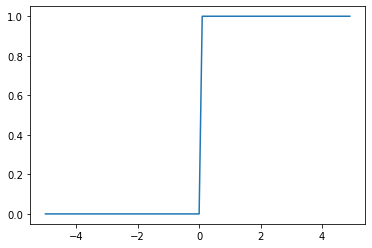

In [42]:
x=np.arange(-5.0,5.0,0.1)
y0=step_function(x)
plt.plot(x,y0)
plt.show()

In [7]:
# シグモイド関数　２クラス分類問題で使う
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [31]:
x = np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

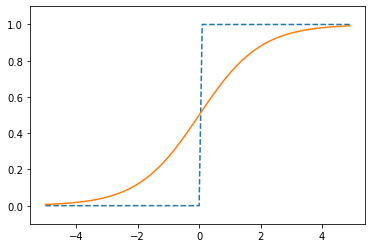

In [43]:
y1=sigmoid(x)
plt.plot(x,y0,linestyle="--",label="step")
plt.plot(x,y1,label="sigmoid")
plt.ylim(-0.1,1.1)
plt.show()

In [34]:
def relu():
    return np.maximuma(0,x)

In [35]:
A = np.array([[1,2],[3,4]])
A.shape

B = np.array([[5,6],[7,8]])
B.shape

np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [36]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

B = np.array([[1,2],[3,4],[5,6]])
B.shape#行列の形状

np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [37]:
C = np.array([[1,2],[3,4]])
C.shape

np.dot(A,C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [38]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

B = np.array([7,8])
B.shape

np.dot(A,B)

array([23, 53, 83])

In [39]:
x=np.array([1,2])
x.shape

w= np.array([[1,3,5],[2,4,6]])
#print(w)
w.shape

y = np.dot(x,w)
print(y)

[ 5 11 17]


In [60]:
# 入力層
X = np.array([1.0,0.5])
#　　重みとバイアス
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])
print(X.shape)
print(W1.shape)
print(B1.shape)
#  第１層目ニューロン
# 入力信号の和
A1 =np.dot(X,W1)+B1
# print(A1.shape)
# 出力信号に変換
# 活性化関数
Z1=sigmoid(A1)
print(A1)
print(Z1)

#　　重みとバイアス
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)
# 第２層目ニューロン
# 入力信号の和
A2 = np.dot(Z1,W2)+B2
print(A2.shape)
# 出力信号に変換
# 活性化関数
Z2 = sigmoid(A2)
print(A2)
print(Z2)

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
(3,)
(3, 2)
(2,)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [61]:
# 恒等関数　そのままを返す。回帰問題で使う
def identity_function(x):
    return x

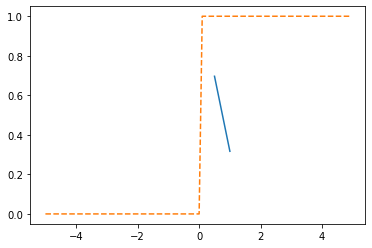

In [67]:
#　　重みとバイアス
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2,W3)+B3
# 出力層
# 活性化関数
Y = identity_function(A3)
plt.plot(X,A3)
plt.plot(x,y0,linestyle="--",label="step")
plt.show()

In [36]:
# # 重み、バイアスをまとめたもの
# def init_network():
# #     ディクショナリ型networkに下記を格納
#     network = {}
# #     重みWで大文字、バイアスは小文字
#     network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
#     network['b1'] = np.array([0.1,0.2,0.3])
#     network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
#     network['b2'] = np.array([0.1,0.2])
#     network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
#     network['b3'] = np.array([0.1,0.2])
    
#     return network

In [70]:
# 入力から出力までを一括にする
def forward(network , x):
    W1,W2,W3 = network['W1'], network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 =np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = identity_function(a3)
    
    return y

In [71]:
network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)
# 出力の変換は
# 恒等関数、シグモイド関数、ソフトマックス関数の3パターン

[0.31682708 0.69627909]


In [74]:
a= np.array([0.3,2.9,4.0])

# 指数関数
exp_a=np.exp(a)
print(exp_a)
# 指数関数の和
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

#  ソフトマックス関数
y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
# #  ソフトマックス関数
# def softmax(a):
#     # 指数関数
#     exp_a=np.exp(a)
#     # 指数関数の和
#     sum_exp_a = np.sum(exp_a)
# #   指数関数　/  指数関数の和
#     y = exp_a / sum_exp_a
    
#     return y
# # これだと指数関数だから簡単に桁が大きくなる
# # 要改善
# # なら最大入力値を上下で乗算
# # logとる
# # そこから引き算？

In [77]:
# 検証
a=np.array([1010,1000,990])
# ここで大きすぎてエラー
np.exp(a) / np.sum(np.exp(a))
# 入力の最大値
c = np.max(a)
# 引き算
a-c

np.exp(a-c) / np.sum(np.exp(a-c))

<ipython-input-77-fb94fd5402ab>:4: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-77-fb94fd5402ab>:4: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [9]:
#  ソフトマックス関数・修正版
def softmax(a):
#     入力の最大値
    c = np.max(a)
    # 指数関数(オーバーフロー対策)
    exp_a=np.exp(a-c)
    # 指数関数の和
    sum_exp_a = np.sum(exp_a)
#   指数関数　/  指数関数の和
    y = exp_a / sum_exp_a
    
    return y

In [82]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)

print(y)

np.sum(y)
# ソフトマックス関数は
# ０～１で出力され合計は１になる
# 確率で使えるど
# 入力→出力の大小が変わらない
# 出力の一番多きいものは変わらない
# 分類するときはソフトマックスは使わんらしい

[0.01821127 0.24519181 0.73659691]


1.0

In [13]:
# (訓練画像、訓練ラベル),(テスト画像,テストラベル)
# normalize:入力画像を0.0～1.0に正規化するか（False:元のピクセルのまま）0から255ピクセルを/255して返すか
# flatten:入力画像を平ら(一次元配列)にするか（False:1*28*28の３次元配列）
# one_hot_label:正解だけ数値がでてそれ以外は０（False:7,2とかそのまま出てくる）
(x_train,t_train),(x_test,t_test) = load_mnist(flatten=True,normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [15]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [24]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 添字が０だと「5」、１だと「0」
img = x_train[0]
label = t_train[0]
print(label)  

print(img.shape)  # (784ピクセル)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


In [2]:
# 機械学習は学習と推論(分類)の２フェーズ
# (訓練画像、訓練ラベル),(テスト画像,テストラベル)という形式で読み込んだMNISTデータを返す
# MNISTデータ:手書きの数字の画像セットで０から９までの数字が訓練用６００００枚、テスト用１００００枚ある
# normalize=Trueで正規化してる→入力データに対して決まった処理をすることを前処理という
# ex.平均や標準偏差で０を中心に分布するように移動させる、データの範囲を一定に収める。分布の形状を均一にする(白色化)
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [3]:
# 学習済みの重み、バイアスがはいってるデータsample_weight.pklを読み込み
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
       network = pickle.load(f)
    return network

In [4]:
#  入力から出力までを一括にする
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [70]:
# 画像取得
x , t = get_data()
# 重み・バイアスを取得
network =  init_network()

accuracy_cnt = 0

# 1枚ずつpredictで分類されていく
for i in range(len(x)):
    y = predict(network,x[i])
#     確率の最大値(予測した解)を取得
    p = np.argmax(y)
#     予測した解が正しいか正しければ+1
    if p == t[i]:
        accuracy_cnt += 1
#         正解数/配列の長さ
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [11]:
# 上記でもいいけど１００枚とかまとまった単位(バッチという)で計測がいい
# メリットデータ転送が早く済む×→訓練テストに対してコストが最小になるように、
# モデルパラメータを少しづつ操作し、モデルを訓練テストに対して適合したパラメータに収束させる方法です。
# ここで細切れのデータが必要（勾配降下法というらしい）
# 画像取得
x , t = get_data()
# 重み・バイアスを取得
network =  init_network()
# バッチの数
batch_size = 100
accuracy_cnt = 0

# 1枚ずつpredictで分類されていく
# range(start,end,step)でバッチの単位ごとに実施できる
# これはhttps://nisshingeppo.com/ai/gradient-descent/を参考にして
for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
#     確率の最大値(予測した解)を取得
#   axisはhttps://deepage.net/features/numpy-axis.html参考に０は↓　１は→で多きいものを出してる　次元ではない
    p = np.argmax(y_batch,axis = 1)
#     予測した解が正しいか正しければ+1
    accuracy_cnt += np.sum(p==t[i:i+batch_size])
#         正解数/配列の長さ
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [68]:
x.shape

(10000, 784)

In [66]:
x[0].shape

(784,)

In [56]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

W1.shape

(784, 50)

In [57]:
W2.shape

(50, 100)

In [58]:
W3.shape

(100, 10)

In [25]:
# 
# 　↓ [0.1,0.8,0.1]
# 　で [0.3,0.1,0.6]
# 　最[0.2,0.5,0.3]
# 　大[0.8,0.1,0.1]
x = np.array([[0.1,0.8,0.1],[0.3,0.1,0.6],[0.2,0.5,0.3],[0.8,0.1,0.1]])
y= np.argmax(x,axis=0)
print(y)

[3 0 1]


In [30]:
# →で最大
# [0.1,0.8,0.1]
# [0.3,0.1,0.6]
# [0.2,0.5,0.3]
# [0.8,0.1,0.1]
x = np.array([[0.1,0.8,0.1],[0.3,0.1,0.6],[0.2,0.5,0.3],[0.8,0.1,0.1]])
x.shape
y= np.argmax(x,axis=1)
print(y)

[1 2 1 0]
